# What is the distribution of paper lengths in CSCW?
by R. Stuart Geiger ([@staeiou](http://twitter.com/staeiou)), staff ethnographer, [Berkeley Institute for Data Science](http://bids.berkeley.edu)

Freely licensed under both [CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/) and [The MIT License](https://opensource.org/licenses/MIT).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker

%matplotlib inline
sns.set(font_scale=2)
#pd.set_option('display.max_rows', -1)


## Data import and processing


In [2]:
merged_df = pd.read_csv("cscw-pages-notext.csv")

In [3]:
merged_df.sample(3).T

,1271,596,76
filename,2017/p2385-sun,2013/p1103-andersen,2004/p112-neale
words,10619,8398,9673
year_float,2017,2013,2004
characters,70362,56424,66519
num_pages,12,10,10
orientation,0,0,0
year,2017,2013,2004
words_per_page,884.917,839.8,967.3
chars_per_word,6.62605,6.71874,6.87677
appx_start,False,False,False


In [4]:
merged_df['year_str'] = merged_df['year'].astype(int).astype(str)

## Descriptive statistics presented in the paper

In [5]:
(merged_df.query("year_float > 2013 & year_float < 2017.5").words).describe()

count      618.000000
mean     10399.911003
std       2054.566880
min       3194.000000
25%       9173.250000
50%      10384.000000
75%      11506.750000
max      19697.000000
Name: words, dtype: float64

In [6]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words).describe()

count      454.000000
mean      7743.392070
std       1104.368778
min       3962.000000
25%       7092.000000
50%       7753.000000
75%       8480.500000
max      10578.000000
Name: body_len_words, dtype: float64

In [7]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words).quantile(.95)

9508.75

In [8]:
len(merged_df.query("year_float > 2017 & body_len_words > 10578")) / len(merged_df.query("year_float > 2017"))

0.5103448275862069

In [9]:
len(merged_df.query("year_float > 2017 & body_len_words < 9509")) / len(merged_df.query("year_float > 2017"))

0.2655172413793103

In [10]:
len(merged_df.query("year_float > 2017 & body_len_words < 7753")) / len(merged_df.query("year_float > 2017"))

0.09310344827586207

In [11]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words).describe()

count      454.000000
mean      7743.392070
std       1104.368778
min       3962.000000
25%       7092.000000
50%       7753.000000
75%       8480.500000
max      10578.000000
Name: body_len_words, dtype: float64

In [12]:
(merged_df.query("year_float < 2013 & num_pages > 4").body_len_words).quantile(.95)

9508.75

In [13]:
len(merged_df.query("year_float > 2017 & body_len_words < 10231")) / len(merged_df.query("year_float > 2017"))

0.4241379310344828

In [14]:
len(merged_df.query("year_float > 2017 & body_len_words < 9056")) / len(merged_df.query("year_float > 2017"))

0.18275862068965518

## Visualizations on word lengths

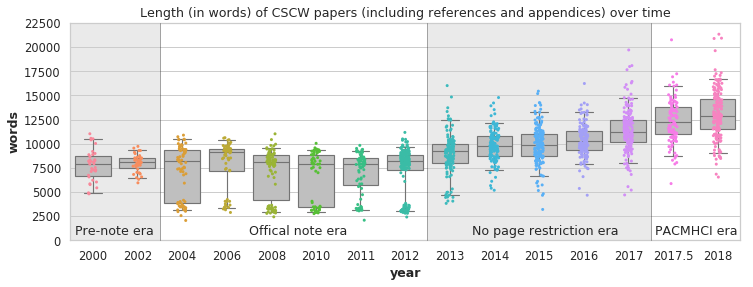

In [15]:
sns.set(font_scale=1.05, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
plt.title("Length (in words) of CSCW papers (including references and appendices) over time")

ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')
plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.09, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.09, zorder=-100)

plt.text(-.4,600,"Pre-note era")
plt.text(3.5,600,"Offical note era")
plt.text(8.5,600,"No page restriction era")
plt.text(12.6,600,"PACMHCI era")

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

plt.ylim(0,22500)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])

plt.savefig("figures/word-len-all.pdf", bbox_inches='tight', dpi=300)

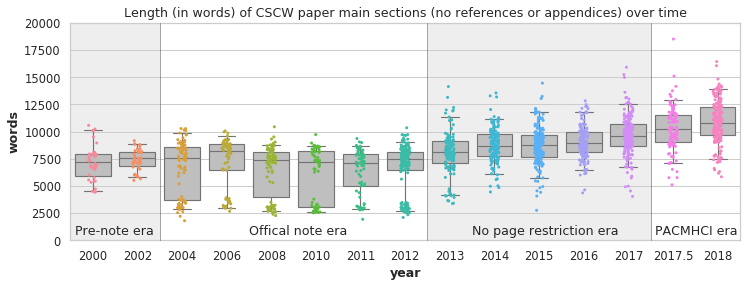

In [16]:
sns.set(font_scale=1.05, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='body_len_words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='BrBG',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='body_len_words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')
plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.07, zorder=-100)
plt.axvspan(7.5, 12.5, facecolor='.1', alpha=0.07, zorder=-100)

plt.text(-.4,500,"Pre-note era")
plt.text(3.5,500,"Offical note era")
plt.text(8.5,500,"No page restriction era")
plt.text(12.6,500,"PACMHCI era")

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

plt.ylim(0,20000)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])
plt.title("Length (in words) of CSCW paper main sections (no references or appendices) over time")
plt.savefig("figures/word-len-body.pdf", bbox_inches='tight', dpi=300)
plt.savefig("figures/word-len-body.png", bbox_inches='tight', dpi=300)


# Proportion of papers that were notes
## Exploratory

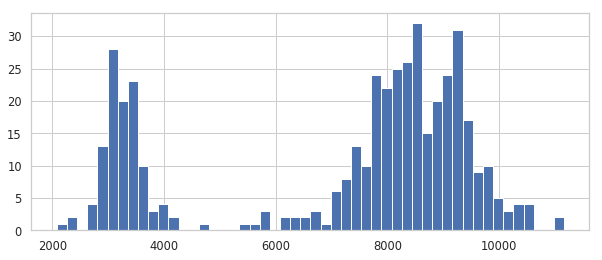

In [17]:
merged_df.query("2004 < year_float < 2013").words.hist(bins=50,figsize=[10,4])

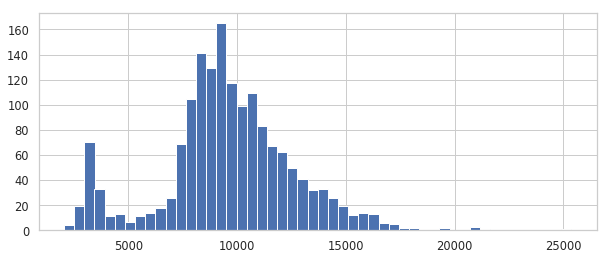

In [18]:
merged_df.words.hist(bins=50,figsize=[10,4])

## Defining length functions

In [19]:
def is_note(row):
    #print(row)
    if float(row['words']) < 5000:
        return True
    else:
        return False

In [20]:
def paper_type(row):
    
    num_words = float(row['words'])
    
    if num_words < 2500:
        return 'abstract'
    elif 5000 > num_words > 2500:
        return 'note'
    elif 11000 > num_words > 5000:  
        return '10 pager'
    elif 16000 > num_words > 11000:
        return 'journal article'
    else:
        return 'long read'

In [21]:
merged_df.query("num_pages == 4").body_len_words.describe()

count     132.000000
mean     3028.515152
std       399.836655
min      1931.000000
25%      2804.750000
50%      2996.500000
75%      3235.750000
max      4536.000000
Name: body_len_words, dtype: float64

In [22]:
def paper_type_alt(row):
    
    num_words = float(row['body_len_words'])
    
    if num_words < 4500:
        return 'note'
    elif 7500 > num_words >= 4500:
        return 'short paper'
    elif 10500 > num_words >= 7500:  
        return 'full paper'
    elif 15000 > num_words >= 10500:
        return 'journal article'
    elif num_words > 15000:
        return 'mega article'

In [23]:
merged_df['is_note'] = merged_df.apply(is_note, axis=1)
merged_df['paper_type'] = merged_df.apply(paper_type, axis=1)
merged_df['paper_type_alt'] = merged_df.apply(paper_type_alt, axis=1)

## Analysis on `paper_type_alt` function

In [24]:
merged_df.paper_type_alt.value_counts()

full paper         890
short paper        312
journal article    272
note               154
mega article         6
Name: paper_type_alt, dtype: int64

In [25]:
df_types_count = merged_df.groupby('year'). \
            paper_type_alt.value_counts(normalize=False, sort=True).unstack()
df_types_count


paper_type_alt,full paper,journal article,mega article,note,short paper
year,,,,,
2000.0,14.0,1.0,NaN,2.0,19.0
2002.0,20.0,NaN,NaN,NaN,19.0
2004.0,39.0,NaN,NaN,23.0,14.0
2006.0,38.0,NaN,NaN,15.0,8.0
2008.0,38.0,NaN,NaN,22.0,26.0
2010.0,22.0,NaN,NaN,22.0,14.0
2011.0,26.0,NaN,NaN,15.0,26.0
2012.0,81.0,NaN,NaN,37.0,46.0
2013.0,86.0,11.0,NaN,12.0,30.0


In [26]:
df_types = merged_df.groupby('year'). \
            paper_type_alt.value_counts(normalize=True, sort=True).unstack()
df_types


paper_type_alt,full paper,journal article,mega article,note,short paper
year,,,,,
2000.0,0.388889,0.027778,NaN,0.055556,0.527778
2002.0,0.512821,NaN,NaN,NaN,0.487179
2004.0,0.513158,NaN,NaN,0.302632,0.184211
2006.0,0.622951,NaN,NaN,0.245902,0.131148
2008.0,0.441860,NaN,NaN,0.255814,0.302326
2010.0,0.379310,NaN,NaN,0.379310,0.241379
2011.0,0.388060,NaN,NaN,0.223881,0.388060
2012.0,0.493902,NaN,NaN,0.225610,0.280488
2013.0,0.618705,0.079137,NaN,0.086331,0.215827


In [27]:
df_types = df_types[['note', 'short paper', 'full paper', 'journal article', 'mega article']]


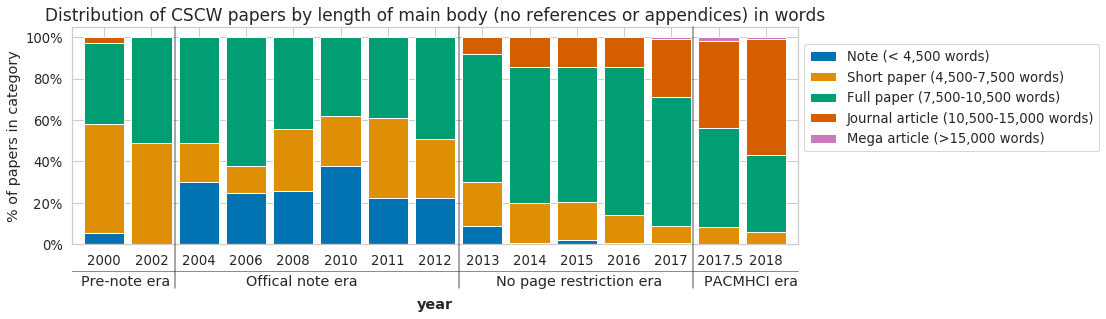

In [28]:
sns.set(font_scale=1.2, style="whitegrid")
pal = sns.color_palette("colorblind")

ax = df_types.plot(kind='bar', stacked=True, figsize=[13,4], width=.85, color=pal)
legend_labels = ['Note (< 4,500 words)', 'Short paper (4,500-7,500 words)', 'Full paper (7,500-10,500 words)', 'Journal article (10,500-15,000 words)', 'Mega article (>15,000 words)']
ax.legend(bbox_to_anchor=(1.0,.95), labels=legend_labels)
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_ylabel("% of papers in category")
plt.title("Distribution of CSCW papers by length of main body (no references or appendices) in words",
         fontdict={'fontsize': 17})
#plt.axvspan(-2, 1.5, facecolor='.1', alpha=0.3, zorder=-100)
#plt.axvspan(7.5, 12.45, facecolor='.1', alpha=0.3,zorder=-100)
ax.set_xlabel("year", fontweight='bold', labelpad=30)

plt.text(-.5,-0.2,"Pre-note era")
plt.text(3,-0.2,"Offical note era")
plt.text(8.3,-0.2,"No page restriction era")
plt.text(12.7,-0.2,"PACMHCI era")
#plt.ylim(-.17,1.1)
#plt.ylim(0,20000)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017," 2017.5",2018])
plt.xticks(rotation='horizontal')

plt.axhline(-.13,  zorder=100, clip_on=False, color='k', alpha=.5, linewidth=1)


plt.axvline(1.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(7.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.axvline(12.45, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5)
plt.ylim(0,1.05)
plt.savefig("figures/dist-len-cat.pdf", bbox_inches='tight', dpi=300)

## Alternate plots

(-0.5, 14.5)


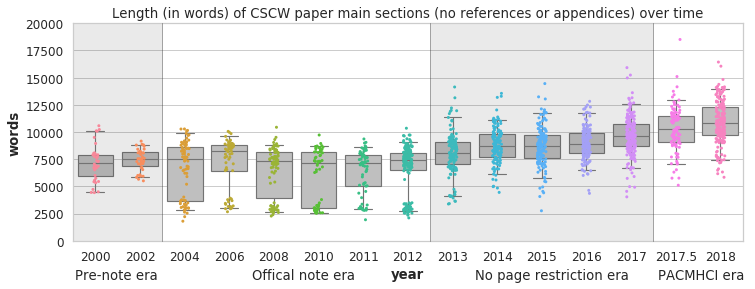

In [29]:
sns.set(font_scale=1.1, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='body_len_words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='body_len_words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
plt.title("Length (in words) of CSCW paper main sections (no references or appendices) over time")
ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold')
plt.axvspan(-2, 1.5, facecolor='.2', alpha=0.1)
plt.axvspan(7.5, 12.5, facecolor='.2', alpha=0.1)

plt.text(-.45,-3500,"Pre-note era")
plt.text(3.5,-3500,"Offical note era")
plt.text(8.5,-3500,"No page restriction era")
plt.text(12.6,-3500,"PACMHCI era")

plt.axvline(1.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=0, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)

plt.ylim(0,20000)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])

plt.savefig("figures/word-len-body2.pdf", bbox_inches='tight', dpi=300)
plt.savefig("figures/word-len-body2.png", bbox_inches='tight', dpi=300)
print(plt.xlim())
    

(-0.5, 14.5)


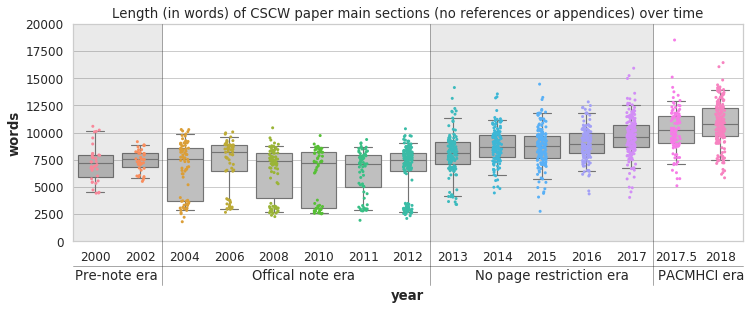

In [30]:
sns.set(font_scale=1.1, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='body_len_words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='body_len_words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
plt.title("Length (in words) of CSCW paper main sections (no references or appendices) over time")
ax.set_ylabel("words", fontweight='bold')
ax.set_xlabel("year", fontweight='bold', labelpad=25)
plt.axvspan(-2, 1.5, facecolor='.2', alpha=0.1)
plt.axvspan(7.5, 12.5, facecolor='.2', alpha=0.1)

plt.text(-.45,-3500,"Pre-note era")
plt.text(3.5,-3500,"Offical note era")
plt.text(8.5,-3500,"No page restriction era")
plt.text(12.6,-3500,"PACMHCI era")

plt.ylim(0,20000)
ax.xaxis.set_ticklabels([2000,2002,2004,2006,2008,2010,2011,2012,2013,2014,2015,2016,2017,2017.5,2018])

plt.axvline(1.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(7.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axvline(12.5, ymin=-.2, zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.axhline(-2300,  zorder=100, clip_on=False, color='k', alpha=.5, linewidth=.75)
plt.savefig("figures/word-len-body3.pdf", bbox_inches='tight', dpi=300)
plt.savefig("figures/word-len-body3.png", bbox_inches='tight', dpi=300)
print(plt.xlim())
    

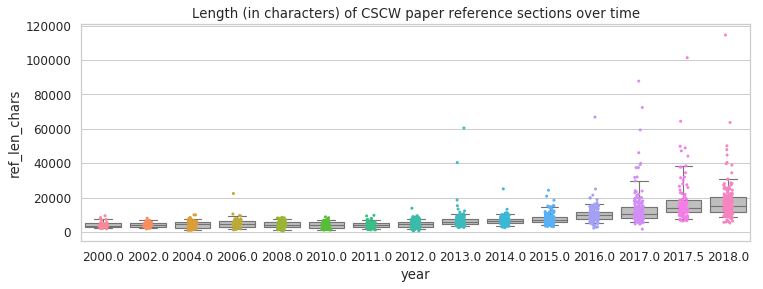

In [31]:
sns.set(font_scale=1.1, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='ref_len_chars',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='ref_len_chars',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
plt.title("Length (in characters) of CSCW paper reference sections over time")
plt.savefig("figures/ref-len-chars.pdf", bbox_inches='tight', dpi=300)

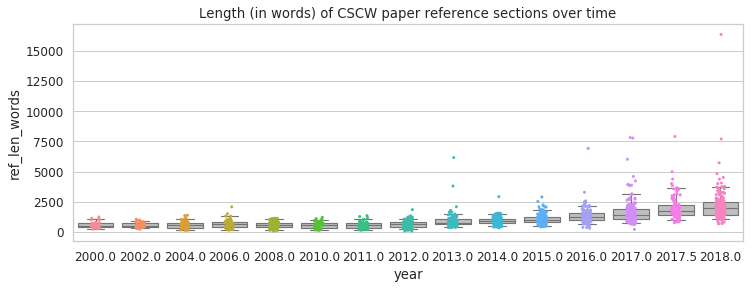

In [32]:
sns.set(font_scale=1.1, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='ref_len_words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='ref_len_words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )
plt.title("Length (in words) of CSCW paper reference sections over time")
plt.savefig("figures/ref-len-words.pdf", bbox_inches='tight', dpi=300)

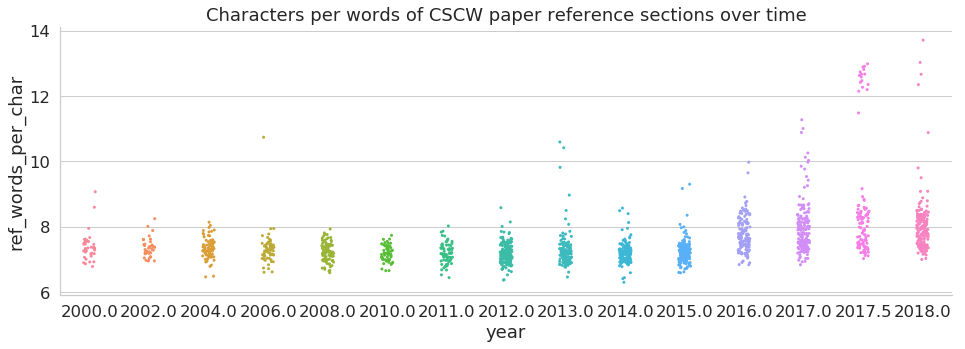

In [33]:
sns.set(font_scale=1.5, style='whitegrid')

sns.catplot(data=merged_df,
            y='ref_words_per_char',
            x='year',
            kind="strip",
            aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            height=5
           )
plt.title("Characters per words of CSCW paper reference sections over time")
plt.savefig("figures/ref-words-per-char.pdf")

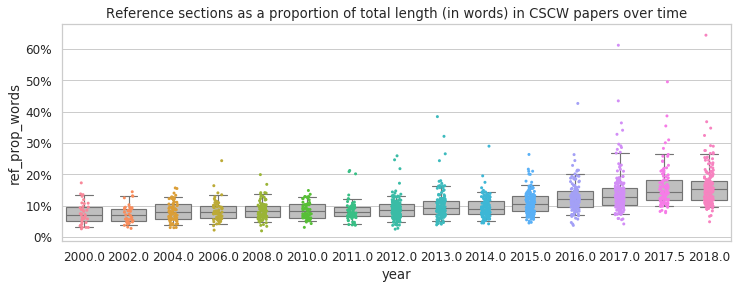

In [34]:
sns.set(font_scale=1.1, style='whitegrid')
fig, ax = plt.subplots(figsize=[12,4])

sns.stripplot(data=merged_df,
            y='ref_prop_words',
            x='year',
              jitter=True,
            #kind="strip",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            #height=5,
              #color="grey",
            ax=ax
           )
sns.boxplot(data=merged_df,
            y='ref_prop_words',
            x='year',
            color=".75",
            fliersize=0,
            linewidth=1.15,
            whis=[5,95],
            #notch=True,
            #kind="box",
            #aspect=2.75,
            #palette='viridis',
            #orient="h",
            #s=3,
            #height=5, 
            ax=ax
           )

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.title("Reference sections as a proportion of total length (in words) in CSCW papers over time")
plt.savefig("figures/ref-prop-words.pdf", bbox_inches='tight', dpi=300)

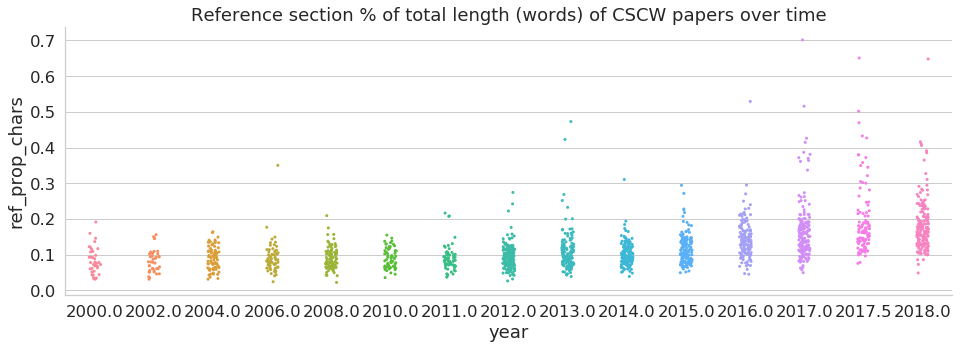

In [35]:
sns.set(font_scale=1.5, style='whitegrid')

sns.catplot(data=merged_df,
            y='ref_prop_chars',
            x='year',
            kind="strip",
            aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            height=5
           )
plt.title("Reference section % of total length (words) of CSCW papers over time")
plt.savefig("figures/ref-prop-chars.pdf")

Text(0.5, 0.98, 'Stripplot for mean word length (characters) of CSCW papers over time')

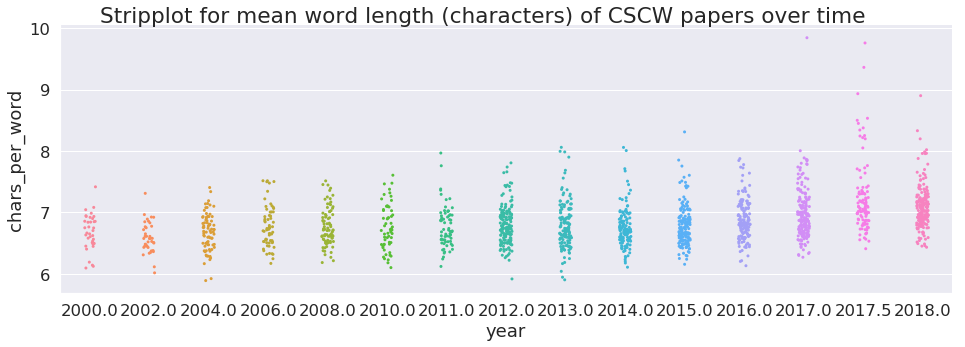

In [36]:
sns.set(font_scale=1.5)

sns.catplot(data=merged_df,
            y='chars_per_word',
            x='year',
            kind="strip",
            aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            height=5
           )
plt.suptitle("Stripplot for mean word length (characters) of CSCW papers over time")

Text(0.5, 0.98, 'Stripplot for words per page of CSCW papers over time')

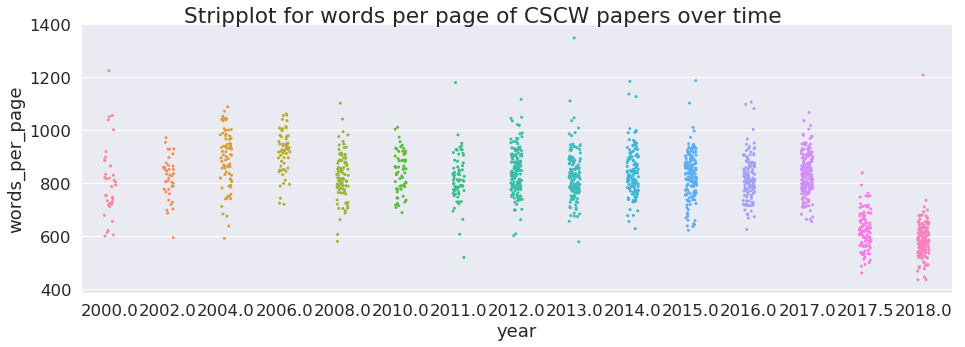

In [37]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
#sns.violinplot(data=df_words.dropna(), y='words', x='year', whis=[5,95], ax=ax, color=".8")
sns.catplot(data=merged_df,
            y='words_per_page',
            x='year',
            kind="strip",
            aspect=2.75,
            #palette='viridis',
            #orient="h",
            s=3,
            height=5
           )
plt.suptitle("Stripplot for words per page of CSCW papers over time")